In [36]:
# Library Installation

import pandas as pd
import matplotlib.pyplot as plt

Dates & Times with pandas

In [37]:
my_ts = pd.date_range(start = '2026-02-01', periods = 7, freq = 'D')

for day in my_ts:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [38]:
# creating Month date range

my_ts_2 = pd.date_range(start = '2026-01-01', periods = 12, freq = "ME")

for month in my_ts_2:
    print(month.days_in_month, month.month_name())

31 January
28 February
31 March
30 April
31 May
30 June
31 July
31 August
30 September
31 October
30 November
31 December


In [39]:
# creating Business Day date range

my_ts_3 = pd.date_range(start = '2026-02-01', periods = 20, freq = "B")

for day in my_ts_3:
    print(day.dayofweek, day.day_name(), day.date())

0 Monday 2026-02-02
1 Tuesday 2026-02-03
2 Wednesday 2026-02-04
3 Thursday 2026-02-05
4 Friday 2026-02-06
0 Monday 2026-02-09
1 Tuesday 2026-02-10
2 Wednesday 2026-02-11
3 Thursday 2026-02-12
4 Friday 2026-02-13
0 Monday 2026-02-16
1 Tuesday 2026-02-17
2 Wednesday 2026-02-18
3 Thursday 2026-02-19
4 Friday 2026-02-20
0 Monday 2026-02-23
1 Tuesday 2026-02-24
2 Wednesday 2026-02-25
3 Thursday 2026-02-26
4 Friday 2026-02-27


Indexing & resampling time series

In [40]:
nyc_df = pd.read_csv('data/nyc.csv')

nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6317 non-null   int64  
 1   date        6317 non-null   str    
 2   ozone       6317 non-null   float64
 3   pm25        6317 non-null   float64
 4   co          6317 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 246.9 KB


In [41]:
# changing the str date col to datetime64 format
nyc_df.date = pd.to_datetime(nyc_df.date)

nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  6317 non-null   int64         
 1   date        6317 non-null   datetime64[us]
 2   ozone       6317 non-null   float64       
 3   pm25        6317 non-null   float64       
 4   co          6317 non-null   float64       
dtypes: datetime64[us](1), float64(3), int64(1)
memory usage: 246.9 KB


In [42]:
# set date col as index

nyc_df.set_index('date', inplace= True)
nyc_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6317 non-null   int64  
 1   ozone       6317 non-null   float64
 2   pm25        6317 non-null   float64
 3   co          6317 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 246.8 KB


In [43]:
nyc_df.drop(columns=['Unnamed: 0'], inplace = True)
nyc_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


In [44]:
nyc_df.head()

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


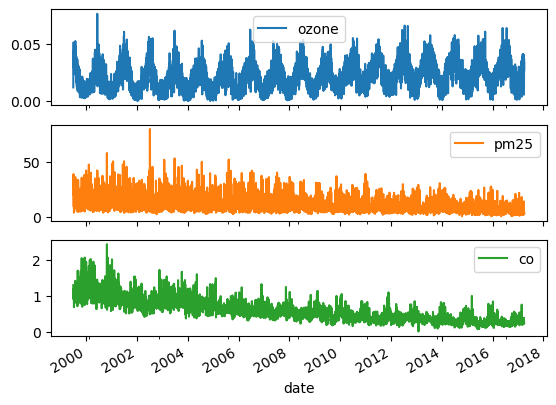

In [45]:
nyc_df.plot(subplots= True)
plt.savefig('output/nyc_df_subplot.png')
plt.show()

Compare annual stock price trends

In [51]:
yahoo = pd.read_csv('data/yahoo.csv')
yahoo.info()

<class 'pandas.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    str    
 1   price   756 non-null    float64
dtypes: float64(1), str(1)
memory usage: 12.3 KB


In [52]:
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [53]:
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace = True)

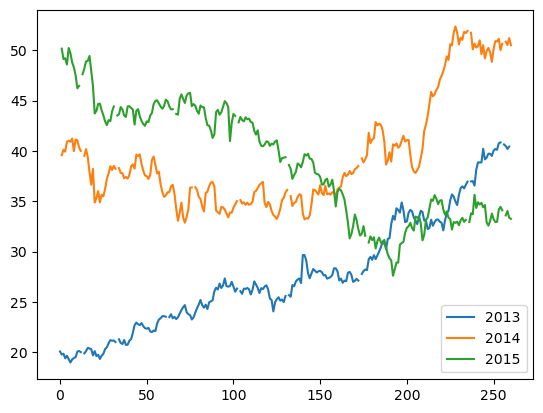

In [56]:
prices = pd.DataFrame()
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop = True)
    price_per_year.rename(columns = {'price': year}, inplace = True)
    prices = pd.concat([prices, price_per_year], axis = 1)

prices.plot()
plt.savefig('output/yahoo_2013-15_data.png')
plt.show()

Set and change time series frequency

In [70]:
co = pd.read_csv('data/co_cities.csv')
print(co.info())
print(co.head())

<class 'pandas.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1898 non-null   str    
 1   Chicago      1898 non-null   float64
 2   Los Angeles  1898 non-null   float64
 3   New York     1898 non-null   float64
dtypes: float64(3), str(1)
memory usage: 59.4 KB
None
         date   Chicago  Los Angeles  New York
0  2005-01-01  0.317763     0.777657  0.639830
1  2005-01-03  0.520833     0.349547  0.969572
2  2005-01-04  0.477083     0.626630  0.905208
3  2005-01-05  0.348822     0.613814  0.769176
4  2005-01-06  0.572917     0.792596  0.815761


In [71]:
# set to datetime64 format

co.date = pd.to_datetime(co.date)
co.set_index('date', inplace=True)
print(co.info())
print(co.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None
             Chicago  Los Angeles  New York
date                                       
2005-01-01  0.317763     0.777657  0.639830
2005-01-03  0.520833     0.349547  0.969572
2005-01-04  0.477083     0.626630  0.905208
2005-01-05  0.348822     0.613814  0.769176
2005-01-06  0.572917     0.792596  0.815761


             Chicago  Los Angeles  New York
date                                       
2005-01-01  0.317763     0.777657  0.639830
2005-01-02       NaN          NaN       NaN
2005-01-03  0.520833     0.349547  0.969572
2005-01-04  0.477083     0.626630  0.905208
2005-01-05  0.348822     0.613814  0.769176


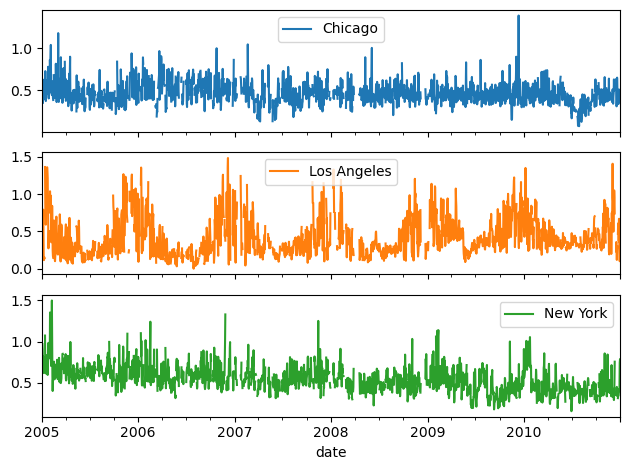

In [74]:
# Set frequency to calendar daily

co = co.asfreq('D')
print(co.head())

co.plot(subplots=True)
plt.savefig('output/co_daily_freq.png')
plt.tight_layout()
plt.show()

             Chicago  Los Angeles  New York
date                                       
2005-01-31  0.850000     0.800498  0.799479
2005-02-28  0.575000     0.397600  0.780729
2005-03-31  0.412500     0.432972  0.740672
2005-04-30  0.502083     0.291304  0.716382
2005-05-31  0.520834     0.292753  0.615625


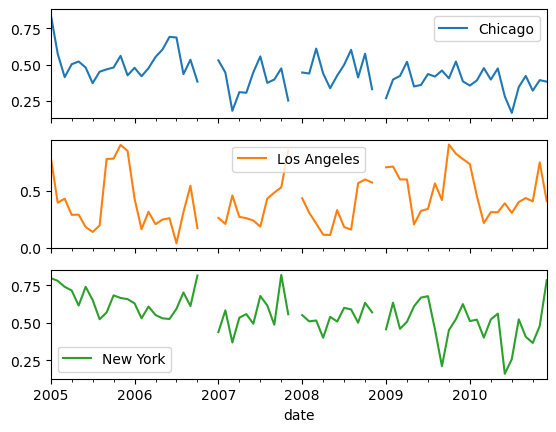

In [77]:
# Set frquency to Monthly

co = co.asfreq('ME')
print(co.head())
co.plot(subplots=True)
plt.savefig('output/co_monthly_freq.png')
plt.show()

Lags, changes, and returns for stock price series

In [80]:
google = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date').drop(columns='Unnamed: 0')
print(google.info())
print(google.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB
None
             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10


In [ ]:
# Set data frequency to business daily
google = google.asfreq('B')
print(google.head())

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04


In [82]:
# Create 'lagged' and 'shifted'

google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)
google.head()

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN


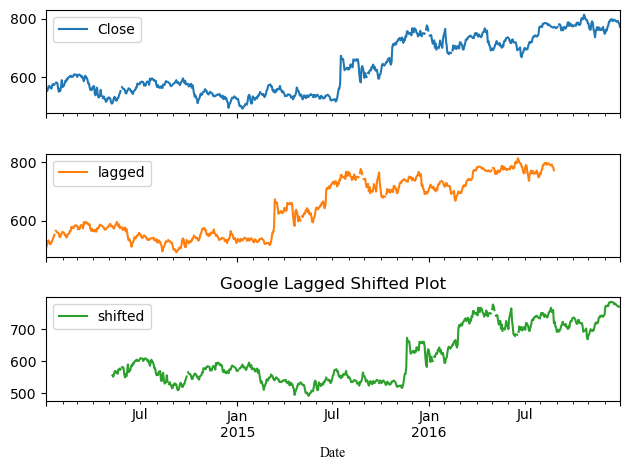

In [84]:
google.plot(subplots=True)
plt.xlabel('Date', family = 'Times New Roman')
plt.title('Google Lagged Shifted Plot')
plt.tight_layout()

plt.savefig('output/google_lagged_shifted.png')
plt.show()